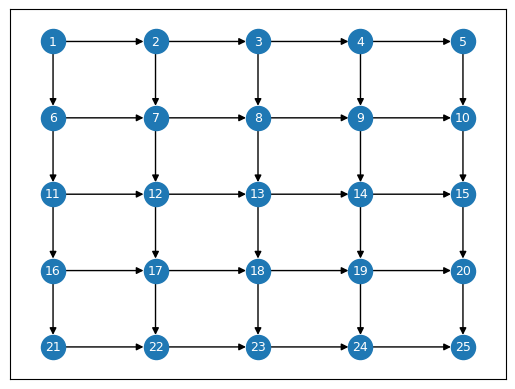

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

In [ ]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, 'stats_10000_4.pkl')

## Fusion of files

In [1]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

385
10000


In [6]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

In [14]:
# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

## Flow network : Solving

In [1]:
%run utils.py

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
Network

,~,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;,link_id
0,NaN,1,2,2000,40,0.6,0.15,4,60,0,0,;,0
1,NaN,2,1,2000,40,0.6,0.15,4,60,0,0,;,1
2,NaN,1,6,2000,40,0.6,0.15,4,60,0,0,;,2
3,NaN,6,1,2000,40,0.6,0.15,4,60,0,0,;,3
4,NaN,2,3,2000,40,0.6,0.15,4,60,0,0,;,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,23,22,2000,40,0.6,0.15,4,60,0,0,;,75
76,NaN,23,24,2000,40,0.6,0.15,4,60,0,0,;,76
77,NaN,24,23,2000,40,0.6,0.15,4,60,0,0,;,77
78,NaN,24,25,2000,40,0.6,0.15,4,60,0,0,;,78


In [22]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print(count2)
    


0
117
1
228
2
315
3
413
4
498
5
602
6
715
7
811
8
905
9
1008
10
1090
11
1197
12
1326
13
1419
14
1516
15
1625
16
1727
17
1824
18
1924
19
2024
20
2119
21
2224
22
2324
23
2436
24
2518
25
2644
26
2753
27
2863
28
2960
29
3058
30
3166
31
3287
32
3396
33
3512
34
3622
35
3739
36
3854
37
3961
38
4069
39
4163
40
4292
41
4393
42
4488
43
4595
44
4697
45
4796
46
4910
47
5020
48
5102
49
5189
50
5286
51
5382
52
5468
53
5574
54
5659
55
5780
56
5872
57
5966
58
6074
59
6178
60
6281
61
6394
62
6508
63
6610
64
6715
65
6845
66
6924
67
7013
68
7132
69
7228
70
7339
71
7435
72
7544
73
7660
74
7760
75
7854
76
7952
77
8050
78
8180
79
8291
80
8384
81
8482
82
8597
83
8685
84
8789
85
8889
86
8996
87
9084
88
9182
89
9297
90
9416
91
9519
92
9638
93
9750
94
9847
95
9947
96
10066
97
10190
98
10301
99
10408
100
10498
101
10612
102
10711
103
10814
104
10944
105
11041
106
11144
107
11235
108
11342
109
11440
110
11538
111
11626
112
11723
113
11809
114
11908
115
12025
116
12124
117
12213
118
12312
119
12419
120
12533
121
1

In [1]:
from utils import *

# This file contain 385 OD matrix
a_file = open('stats_40000_1.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Network_5_5.tntp')
# print(Network)

time = 17051
for val in list(stats.values())[165:]:
    for OD_matrix in val :
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status == 2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("C:/Users/Vu Tuan Minh/Desktop/VA/Path_Flow_Prediction/Output/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

17051
Restricted license - for non-production use only - expires 2025-11-24


GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information